# PRÁCTICA 2:

Paquetes necesarios

In [185]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# TAREA1: 

Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

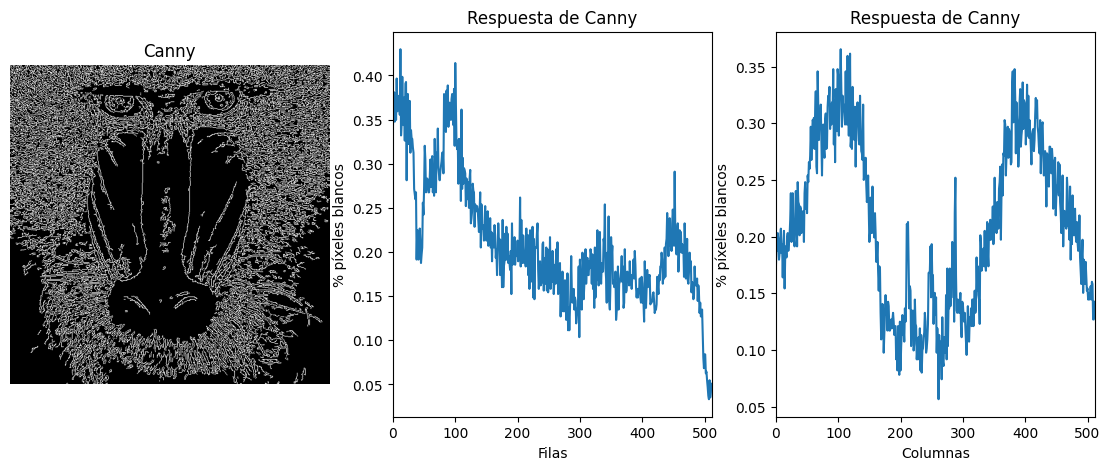

In [186]:
img = cv2.imread('imgs/mandril.jpg')
# #Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
#Parámetros: imagen de entrada, umbral inferior, umbral superior
canny = cv2.Canny(gris, 100, 200)

#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten()
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
row = row_counts / (255 * canny.shape[1])

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 3, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles blancos")
plt.plot(row)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]]) 

plt.subplot(1, 3, 3)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles blancos")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])
plt.savefig("imgs/histogramas_filas_columnas_canny.jpg")


Valor máximo de píxeles blancos por fila: 0.4297
Esto representa 42.97% de píxeles blancos en la fila

Umbral (0.90 * maxfil): 0.3867


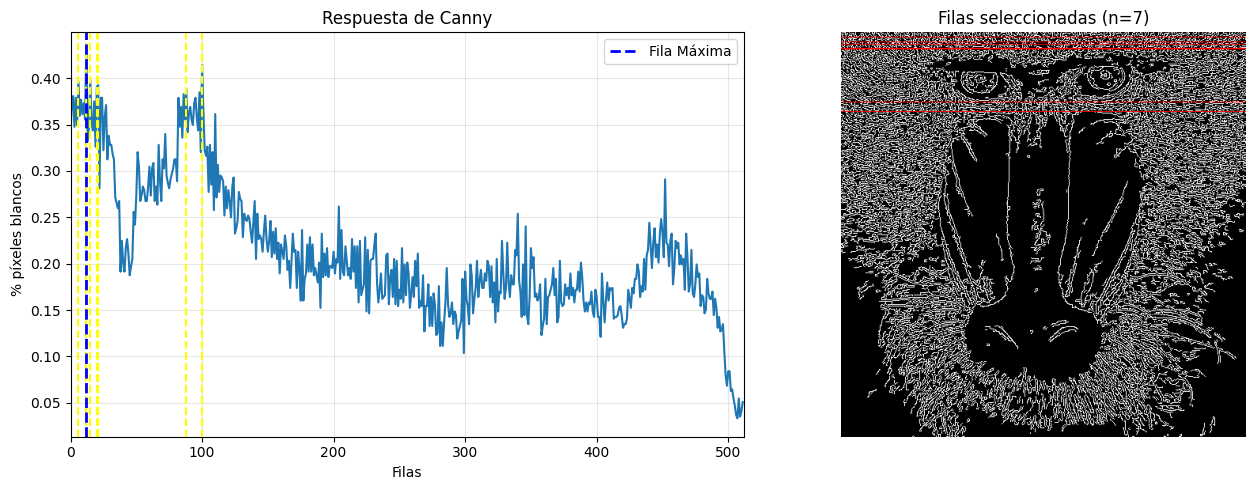

In [187]:
max_row = np.max(row)

print(f"Valor máximo de píxeles blancos por fila: {max_row:.4f}")
print(f"Esto representa {max_row * 100:.2f}% de píxeles blancos en la fila")

umbral = .9 * max_row

print(f"\nUmbral (0.90 * maxfil): {umbral:.4f}")

filas_seleccionadas = np.where(row >= umbral)[0]

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles blancos")
plt.plot(row)

# umbral
#plt.axhline(y=umbral,color="red", linestyle='--', linewidth=2, label=f"Umbral (0.90*max_row)")

for fila in filas_seleccionadas:
    plt.axvline(x=fila,color="yellow", linestyle='--')

# maximo
#plt.axhline(y=max_row,color="green", linestyle='--', linewidth=2, label=f"Valor Máximo")
plt.axvline(x=(np.where(row == max_row)[0]),color="blue", linestyle='--', linewidth=2, label=f"Fila Máxima")


#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])
#plt.ylim([0, max(row) * 1.1])

plt.legend()
plt.grid(True, alpha=.3)

# filas marcadas
plt.subplot(1, 2, 2)
plt.title(f"Filas seleccionadas (n={len(filas_seleccionadas)})")
plt.axis("off")
canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Marcar las filas seleccionadas en rojo
for fila in filas_seleccionadas:
    canny_color[fila, :] = [0, 0, 255]

plt.imshow(cv2.cvtColor(canny_color, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.savefig("imgs/analisis_filas_canny.jpg")
plt.show()

Valor máximo de píxeles blancos por columna: 0.3652
Esto representa 36.52% de píxeles blancos en la columna

Umbral (0.90 * maxfil): 0.3287


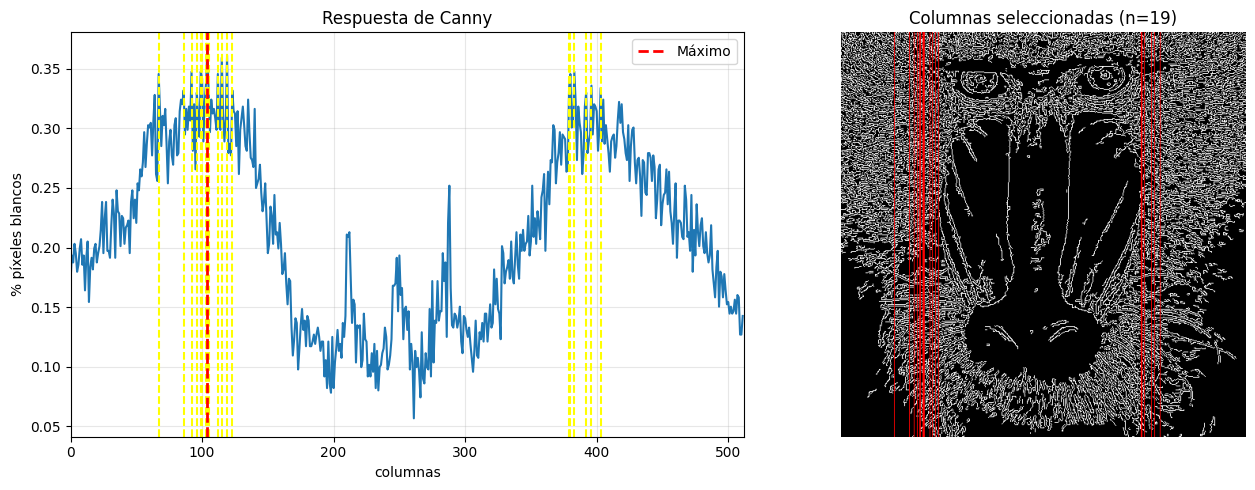

In [189]:
max_col = np.max(cols)

print(f"Valor máximo de píxeles blancos por columna: {max_col:.4f}")
print(f"Esto representa {max_col * 100:.2f}% de píxeles blancos en la columna")

umbral = 0.90 * max_col

print(f"\nUmbral (0.90 * maxfil): {umbral:.4f}")

columnas_seleccionadas = np.where(cols >= umbral)[0]

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Respuesta de Canny")
plt.xlabel("columnas")
plt.ylabel("% píxeles blancos")
plt.plot(cols)

# umbral
for columna in columnas_seleccionadas:
    plt.axvline(x=columna,color="yellow", linestyle='--')

# maximo
plt.axvline(x=(np.where(cols == max_col)),color="red", linestyle='--', linewidth=2, label=f"Máximo")

#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])
#plt.ylim([0, max(row) * 1.1])

plt.legend()
plt.grid(True, alpha=0.3)

# filas marcadas
plt.subplot(1, 2, 2)
plt.title(f"Columnas seleccionadas (n={len(columnas_seleccionadas)})")
plt.axis("off")
canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Marcar las filas seleccionadas en rojo
for columna in columnas_seleccionadas:
    canny_color[:,columna] = [0, 0, 255]

plt.imshow(cv2.cvtColor(canny_color, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.savefig("imgs/analisis_columnas_canny.jpg")
plt.show()

Comparativa:


## TAREA 2:

Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

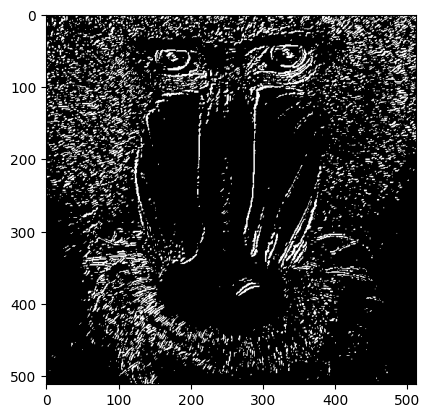

<Figure size 640x480 with 0 Axes>

In [172]:
img = cv2.imread('imgs/mandril.jpg')
# #Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Conversión a byte con openCV
sobel8 = cv2.convertScaleAbs(sobel)

#Define valor umbral
valorUmbral = 130
#Obtiene imagen umbralizada para dicho valor definido
_, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()
plt.savefig("imgs/sobel.jpg")


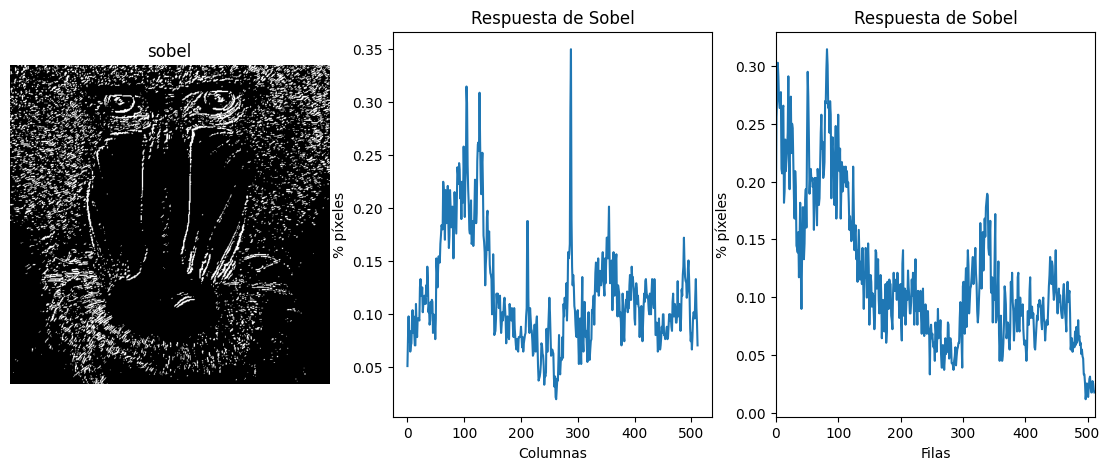

In [176]:
column_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten()

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
column = column_counts[0] / (255 * imagenUmbralizada.shape[0])
row = row_counts / (255 * imagenUmbralizada.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("sobel")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 3, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(column)

plt.subplot(1, 3, 3)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(row)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[1]])
plt.savefig("imgs/histogramas_filas_columnas_sobel.jpg")


Valor máximo de píxeles blancos por columna: 0.3496
Esto representa 34.96% de píxeles blancos en la columna
Valor máximo de píxeles blancos por fila: 0.3145
Esto representa 31.45% de píxeles blancos en la fila

Umbral Columnas (0.90): 0.3146

Umbral Filas (0.90): 0.2830


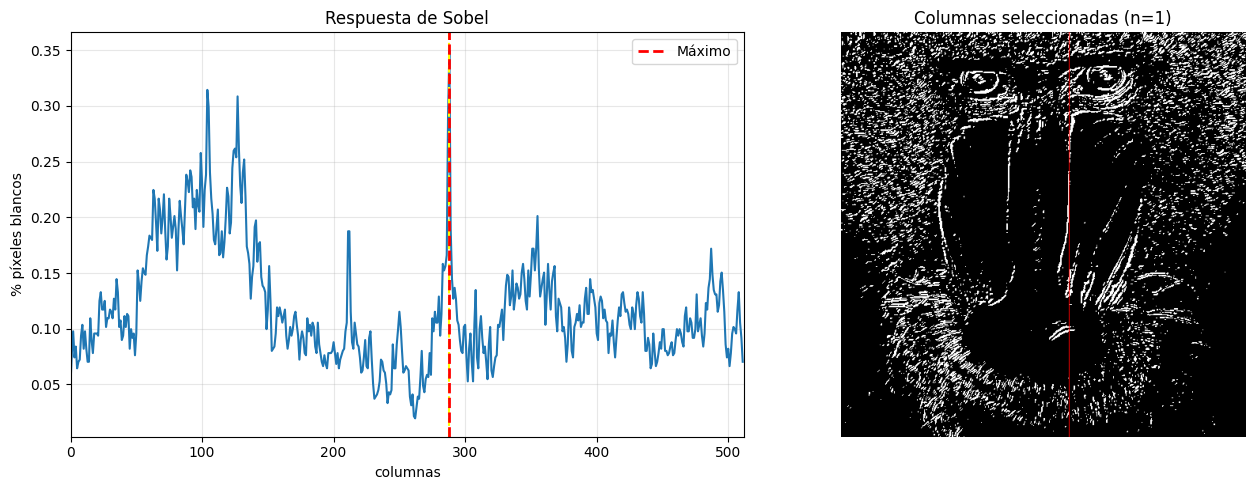

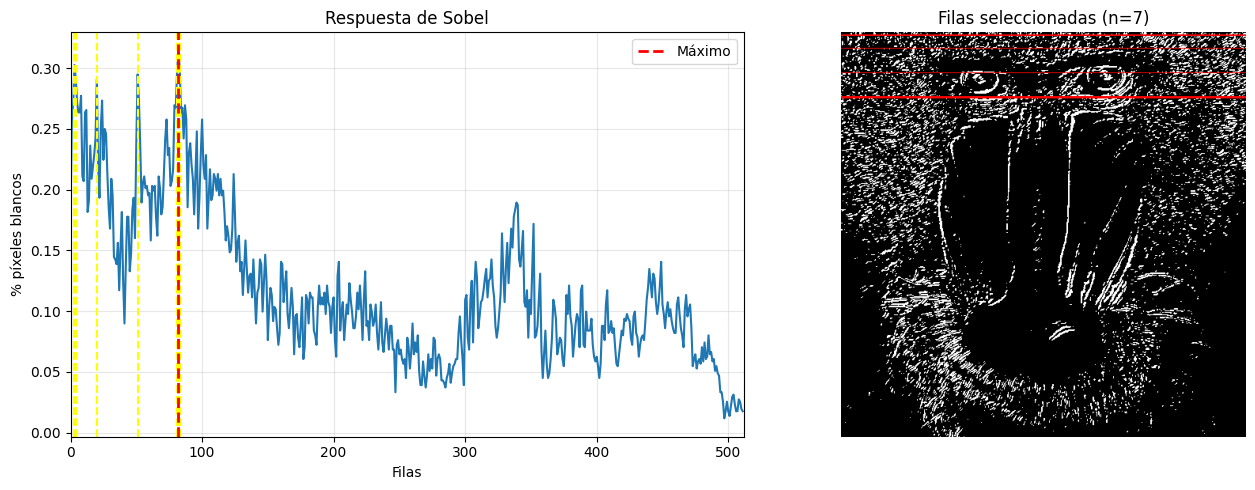

In [177]:
max_column_value = np.max(column)
max_row_value = np.max(row)

print(f"Valor máximo de píxeles blancos por columna: {max_column_value:.4f}")
print(f"Esto representa {max_column_value * 100:.2f}% de píxeles blancos en la columna")

print(f"Valor máximo de píxeles blancos por fila: {max_row_value:.4f}")
print(f"Esto representa {max_row_value * 100:.2f}% de píxeles blancos en la fila")

umbral_col = 0.90 * max_column_value
umbral_row = 0.90 * max_row_value

print(f"\nUmbral Columnas (0.90): {umbral_col:.4f}")
print(f"\nUmbral Filas (0.90): {umbral_row:.4f}")

columnas_seleccionadas = np.where(column >= umbral_col)[0]
filas_seleccionadas = np.where(row >= umbral_row)[0]

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Respuesta de Sobel")
plt.xlabel("columnas")
plt.ylabel("% píxeles blancos")
plt.plot(column)

# umbral
for columna in columnas_seleccionadas:
    plt.axvline(x=columna,color="yellow", linestyle='--')

# maximo
plt.axvline(x=(np.where(column == max_column_value)),color="red", linestyle='--', linewidth=2, label=f"Máximo")

#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[0]])
#plt.ylim([0, max(row) * 1.1])

plt.legend()
plt.grid(True, alpha=0.3)

# filas marcadas
plt.subplot(1, 2, 2)
plt.title(f"Columnas seleccionadas (n={len(columnas_seleccionadas)})")
plt.axis("off")
imagenUmbralizada_color = cv2.cvtColor(imagenUmbralizada, cv2.COLOR_GRAY2BGR)

# Marcar las filas seleccionadas en rojo
for columna in columnas_seleccionadas:
    imagenUmbralizada_color[:,columna] = [0, 0, 255]

plt.imshow(cv2.cvtColor(imagenUmbralizada_color, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.savefig("imgs/analisis_columnas_sobel.jpg")
plt.show()



plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles blancos")
plt.plot(row)

# umbral
for fila in filas_seleccionadas:
    plt.axvline(x=fila,color="yellow", linestyle='--')

# maximo
plt.axvline(x=(np.where(row == max_row_value)),color="red", linestyle='--', linewidth=2, label=f"Máximo")

#Rango en x definido por las filas
plt.xlim([0, imagenUmbralizada.shape[1]])
#plt.ylim([0, max(row) * 1.1])

plt.legend()
plt.grid(True, alpha=0.3)

# filas marcadas
plt.subplot(1, 2, 2)
plt.title(f"Filas seleccionadas (n={len(filas_seleccionadas)})")
plt.axis("off")
imagenUmbralizada_color = cv2.cvtColor(imagenUmbralizada, cv2.COLOR_GRAY2BGR)

# Marcar las filas seleccionadas en rojo
for fila in filas_seleccionadas:
    imagenUmbralizada_color[fila,:] = [0, 0, 255]

plt.imshow(cv2.cvtColor(imagenUmbralizada_color, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.savefig("imgs/analisis_filas_sobel.jpg")
plt.show()



# COMPARATIVA ENTRE SOBEL Y CANNY:

### **Algoritmo:**

- **Sobel**: Es un operador basado en gradientes que calcula derivadas de primera orden en direcciones x e y. Detecta cambios de intensidad y produce bordes "gruesos" con valores proporcionales a la magnitud del gradiente.
- **Canny**: Es un detector de bordes multi-etapa que incluye suavizado gaussiano, cálculo de gradientes, supresión no-máxima y umbralización con histéresis. Produce bordes finos de un píxel de ancho.

### **Preprocesamiento:**

- **Sobel**: Aplicas un suavizado Gaussiano (3x3) antes de calcular los gradientes.
- **Canny**: OpenCV ya incluye suavizado interno en el algoritmo, no requieres aplicarlo explícitamente.

### **Resultados:**

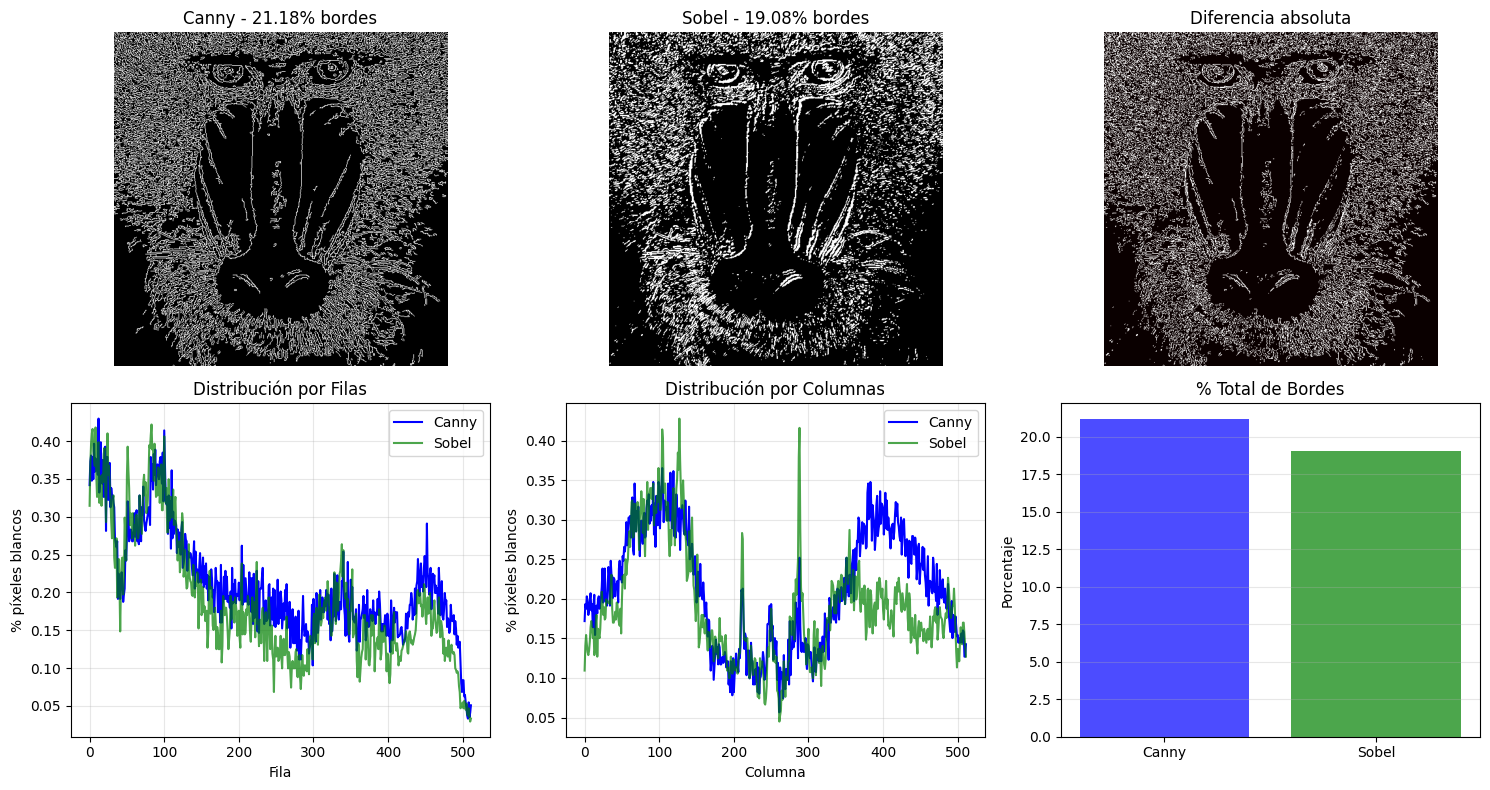


Canny:
  - Porcentaje de bordes: 21.18%
  - Max por fila: 42.97%
  - Max por columna: 36.52%

Sobel:
  - Porcentaje de bordes: 19.08%
  - Max por fila: 42.19%
  - Max por columna: 42.77%

Diferencia: 2.10%


In [154]:


# Calcular estadísticas
def stats(imagen):
    total = imagen.shape[0] * imagen.shape[1]
    blancos = np.sum(imagen == 255)
    return {
        'porcentaje': (blancos / total) * 100,
        'row': cv2.reduce(imagen, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten() / (255 * imagen.shape[1]),
        'col': cv2.reduce(imagen, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten() / (255 * imagen.shape[0])
    }

s_canny = stats(canny)
s_sobel = stats(imagenUmbralizada)

# Visualización
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Imágenes
axes[0, 0].imshow(canny, cmap='gray')
axes[0, 0].set_title(f'Canny - {s_canny["porcentaje"]:.2f}% bordes')
axes[0, 0].axis('off')

axes[0, 1].imshow(imagenUmbralizada, cmap='gray')
axes[0, 1].set_title(f'Sobel - {s_sobel["porcentaje"]:.2f}% bordes')
axes[0, 1].axis('off')

# Diferencia
diff = cv2.absdiff(canny, imagenUmbralizada)
axes[0, 2].imshow(diff, cmap='hot')
axes[0, 2].set_title('Diferencia absoluta')
axes[0, 2].axis('off')

# Distribución por filas
axes[1, 0].plot(s_canny['row'], 'b-', label='Canny', linewidth=1.5)
axes[1, 0].plot(s_sobel['row'], 'g-', label='Sobel', linewidth=1.5, alpha=0.7)
axes[1, 0].set_title('Distribución por Filas')
axes[1, 0].set_xlabel('Fila')
axes[1, 0].set_ylabel('% píxeles blancos')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Distribución por columnas
axes[1, 1].plot(s_canny['col'], 'b-', label='Canny', linewidth=1.5)
axes[1, 1].plot(s_sobel['col'], 'g-', label='Sobel', linewidth=1.5, alpha=0.7)
axes[1, 1].set_title('Distribución por Columnas')
axes[1, 1].set_xlabel('Columna')
axes[1, 1].set_ylabel('% píxeles blancos')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Comparación de valores máximos
axes[1, 2].bar(['Canny', 'Sobel'], 
               [s_canny['porcentaje'], s_sobel['porcentaje']], 
               color=['blue', 'green'], alpha=0.7)
axes[1, 2].set_title('% Total de Bordes')
axes[1, 2].set_ylabel('Porcentaje')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("imgs/comparacion_canny_sobel.jpg", dpi=120)
plt.show()

# Estadísticas en consola
print(f"\nCanny:")
print(f"  - Porcentaje de bordes: {s_canny['porcentaje']:.2f}%")
print(f"  - Max por fila: {np.max(s_canny['row'])*100:.2f}%")
print(f"  - Max por columna: {np.max(s_canny['col'])*100:.2f}%")

print(f"\nSobel:")
print(f"  - Porcentaje de bordes: {s_sobel['porcentaje']:.2f}%")
print(f"  - Max por fila: {np.max(s_sobel['row'])*100:.2f}%")
print(f"  - Max por columna: {np.max(s_sobel['col'])*100:.2f}%")

print(f"\nDiferencia: {abs(s_canny['porcentaje'] - s_sobel['porcentaje']):.2f}%")


---------------------------

## TAREA 3:
Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


IDEAS:
    - Integrar interactividad en la demo -> Elegir con los controladores el efecto
    - Efectos sobre vídeo: Usar una clase y cada efecto es método
        - Negativo
        - Hue changing
        - Color invertion
        - Estela colores
        - Segmentar colores
        - Cartoon effect -> Findi blanco y edges negro

### POP ART:

In [180]:
video = cv2.VideoCapture(0)

# Configuración
num_circles = 20
circle_size = 2
circle_color = (0, 0, 0)

def shift_hue_and_add_circles(hsv_img, shift):
    # Shift hue
    hsv_copy = hsv_img.copy()
    hsv_copy[:, :, 0] = (hsv_copy[:, :, 0].astype(int) + shift) % 180
    
    # Convertir a RGB
    rgb_img = cv2.cvtColor(hsv_copy, cv2.COLOR_HSV2RGB)
    
    # Añadir círculos en RGB
    height, width = rgb_img.shape[:2]
    step_x = width // num_circles
    step_y = height // num_circles

    for y in range(0, height, step_y):
        for x in range(0, width, step_x):
            cv2.circle(rgb_img, (x, y), circle_size, circle_color, -1)

    return rgb_img

def create_pop_art_grid(frame):
    """Crea una cuadrícula 3x3 de pop art a partir de un frame"""
    # Convertir a HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Generar 9 variaciones con diferentes shifts de hue
    shifts = [0, 30, 60, 90, 10, 100, 15, 150, 45]
    imgs = [shift_hue_and_add_circles(hsv, shift) for shift in shifts]
    
    # Crear cuadrícula 3x3
    rows = []
    for i in range(0, 9, 3):
        row = np.hstack(imgs[i:i+3])
        rows.append(row)
    grid = np.vstack(rows)
    
    # Convertir de RGB a BGR para cv2
    return cv2.cvtColor(grid, cv2.COLOR_RGB2BGR)


while True:
        ret, frame = video.read()

        if not ret:
                break

        pop_art_frame = create_pop_art_grid(frame)
        
        # Mostrar (redimensionar si es muy grande)
        display_frame = cv2.resize(pop_art_frame, (960, 960))
        cv2.imshow('Pop Art Video', display_frame)
        
        
        if cv2.waitKey(20) == 27:
                break
        
video.release()
cv2.destroyAllWindows()

### Borde con sobel y canny:

In [55]:
video = cv2.VideoCapture(0)

# Configuración
valorUmbral = 100
linf = 100
lsup = 255

def border_sobel(frame):
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ggris = cv2.GaussianBlur(gris, (3, 3), 0)

        sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
        sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
        sobel = cv2.add(sobelx, sobely)

        sobel8 = cv2.convertScaleAbs(sobel)

        _, frame_umbralizado = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

        return cv2.bitwise_not(frame_umbralizado)

def border_canny(frame, linf, lsup):
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gris, linf, lsup)

        return cv2.bitwise_not(canny)

while True:
        ret, frame = video.read()

        if not ret:
                break

        #final_frame = border_sobel(frame)
        final_frame = border_canny(frame, linf, lsup)
        
        cv2.imshow('Borde', final_frame)
        
        
        if cv2.waitKey(20) == 27:
                break
        
video.release()
cv2.destroyAllWindows()

### Colored edges

In [181]:
video = cv2.VideoCapture(0)

# Configuración
valorUmbral = 100
linf = 100
lsup = 255


def border_canny(frame, linf, lsup):
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gris, linf, lsup)

        return cv2.bitwise_not(canny)

def posterize(frame, levels=6):
    """Reduce el número de colores (efecto cartoon plano)"""
    div = 256 // levels
    return (frame // div) * div

def apply_pop_art_color(frame, hue_shift=30):
    """Aplica efecto de color pop art"""
    # Convertir a HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Shift de tonalidad
    hsv[:, :, 0] = (hsv[:, :, 0].astype(int) + hue_shift) % 180
    # Aumentar saturación para colores más vibrantes
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.3, 0, 255).astype(np.uint8)
    # Convertir de vuelta a BGR
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def create_cartoon_effect(frame):
    # 1) Colores planos
    colored = posterize(frame, levels=6)
    colored = apply_pop_art_color(colored, hue_shift=30)

    # 2) Bordes
    edges = border_canny(frame, 100, 255)
    edges_inv = cv2.bitwise_not(edges)   # fondo blanco, bordes negros
    edges_color = cv2.cvtColor(edges_inv, cv2.COLOR_GRAY2BGR)

    # 3) Combinar
    result = cv2.bitwise_and(colored, edges_color)

    return result


while True:
        ret, frame = video.read()

        if not ret:
                break

        #final_frame = border_sobel(frame)
        #final_frame = border_canny(frame, linf, lsup)
        final_frame = create_cartoon_effect(frame)
        
        cv2.imshow('Borde', final_frame)
        
        
        if cv2.waitKey(20) == 27:
                break
        
video.release()
cv2.destroyAllWindows()

## Cartoon effect

### INTENTANDO CON MINIMIZAR LOS BITS:

In [182]:
video = cv2.VideoCapture(0)

# Configuración
valorUmbral = 100
linf = 100
lsup = 255
grosor = 2

def border_canny_grosor(frame, linf, lsup, grosor):
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gris, linf, lsup)

        kernel = np.ones((grosor, grosor), np.uint8)
        canny_grueso = cv2.dilate(canny, kernel, iterations=1)

        return (255 - canny_grueso)


bits = 1
levels = 2 ** bits          # 4 niveles
step = 256 // levels        # tamaño de cada intervalo (64)

"""
def create_cartoon_effect(frame):
    
        # ---- 2. Cuantizar ----
        colored_regions = (frame // step) * step + step // 2  # mapea al valor central
        edges = border_canny(frame, linf, lsup)
        edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

        result = cv2.add(colored_regions, edges_bgr)

        return result
        """

def create_cartoon_effect(frame):
    
        # ---- 2. Cuantizar ----
        colored_regions = (frame // step) * step + step // 2  # mapea al valor central
        edges = border_canny_grosor(frame, linf, lsup, grosor)
        mask_edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
        mask = mask_edges_bgr.astype(float) / 255.0

        #result = cv2.add(colored_regions, edges_bgr)
        result = (colored_regions * mask).astype(np.uint8)

        return result


while True:
        ret, frame = video.read()

        if not ret:
                break

        #final_frame = border_sobel(frame)
        #final_frame = border_canny(frame, linf, lsup)
        final_frame = create_cartoon_effect(frame)
        
        cv2.imshow('Borde', final_frame)
        
        
        if cv2.waitKey(20) == 27:
                break
        
video.release()
cv2.destroyAllWindows()

INTENTO FALLIDO:

In [ ]:
video = cv2.VideoCapture(0)

# Configuración
valorUmbral = 100
linf = 100
lsup = 255
hue_shift = 45

def border_canny(frame, linf, lsup):
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gris, linf, lsup)

        return cv2.bitwise_not(canny)

def apply_pop_art_color(frame, hue_shift=30):
    """Aplica efecto de color pop art"""
    # Convertir a HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Shift de tonalidad
    hsv[:, :, 0] = (hsv[:, :, 0].astype(int) + hue_shift) % 180
    # Aumentar saturación para colores más vibrantes
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.3, 0, 255).astype(np.uint8)
    # Convertir de vuelta a BGR
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def create_cartoon_effect(frame):
    # 1) Colores planos
    colored = bilateral_filter_color(frame)
    colored = apply_pop_art_color(colored, hue_shift=hue_shift)

    # 2) Bordes
    edges = border_canny(frame, 100, 255)
    edges_inv = cv2.bitwise_not(edges)   # fondo blanco, bordes negros
    # edges_color = cv2.cvtColor(edges_inv, cv2.COLOR_GRAY2BGR)

    # edges invertido: blanco=255, negro=0 
    mask = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR) 
    mask = mask.astype(float) / 255.0

    # 3) Combinar
    #result = cv2.bitwise_and(colored, edges_color)
    result = (colored * mask).astype(np.uint8)

    return result


while True:
        ret, frame = video.read()

        if not ret:
                break

        #final_frame = border_sobel(frame)
        #final_frame = border_canny(frame, linf, lsup)
        final_frame = create_cartoon_effect(frame)
        
        cv2.imshow('Borde', final_frame)
        
        
        if cv2.waitKey(20) == 27:
                break
        
video.release()
cv2.destroyAllWindows()

Segmentación de color

In [ ]:
video = cv2.VideoCapture(0)

def segment_color(frame, range1, range2):
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv_frame, range1, range2)
        return cv2.bitwise_and(frame, frame, mask=mask)

# Rango para el naranja
# range1 = (10,100,100)
# range2 = (25,255,255)

# Verde
# Devolver en bgr y no rgb
range1 = (20,50,0)
range2 = (65,200,255)
while True:
        ret, frame = video.read()

        if not ret:
                break

        final_frame = segment_color(frame, range1, range2)
        
        cv2.imshow("Orange color segmented", final_frame)
        
        if cv2.waitKey(20) == 27:
                break
        
video.release()
cv2.destroyAllWindows()

--------------------------

# TAREA 4:
 Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

DEMOSTRADOR: "MOTION PAINT"
Inspirado en Messa di Voce - Pinta con tu movimiento

Concepto: 
- El movimiento deja "pintura" en pantalla
- Diferentes intensidades de movimiento = diferentes colores
- Los bordes del movimiento se resaltan
- Puedes "borrar" quedándote quieto

In [184]:



# Configuración
UMBRAL_MOVIMIENTO = 25  # Sensibilidad de detección
DECAY_RATE = 0.95       # Velocidad de desvanecimiento (0.9-0.99)
COLOR_INTENSIDAD = 180  # Intensidad máxima de color

# Variables globales
frame_anterior = None
canvas = None
contador_frames = 0

def detectar_movimiento(frame_actual, frame_prev, umbral=25):
    """Detecta diferencia entre frames y devuelve máscara de movimiento"""
    # Convertir a escala de grises
    gris_actual = cv2.cvtColor(frame_actual, cv2.COLOR_BGR2GRAY)
    gris_prev = cv2.cvtColor(frame_prev, cv2.COLOR_BGR2GRAY)
    
    # Suavizar para reducir ruido
    gris_actual = cv2.GaussianBlur(gris_actual, (5, 5), 0)
    gris_prev = cv2.GaussianBlur(gris_prev, (5, 5), 0)
    
    # Diferencia absoluta
    diff = cv2.absdiff(gris_actual, gris_prev)
    
    # Umbralizar
    _, mask = cv2.threshold(diff, umbral, 255, cv2.THRESH_BINARY)
    
    # Limpiar ruido
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask, diff

def calcular_intensidad_movimiento(diff):
    """Calcula la intensidad promedio del movimiento"""
    return np.mean(diff)

def aplicar_colores_movimiento(mask, intensidad, frame_shape):
    """Genera imagen coloreada basada en movimiento e intensidad"""
    # Crear imagen en HSV para control de color
    h, w = frame_shape[:2]
    
    # El Hue cambia con el tiempo para efecto arcoíris
    global contador_frames
    hue = (contador_frames % 180)
    
    # Crear imagen HSV
    color_frame = np.zeros((h, w, 3), dtype=np.uint8)
    
    # Donde hay movimiento, aplicar color
    color_frame[:, :, 0] = hue  # Hue
    color_frame[:, :, 1] = 255  # Saturación máxima
    color_frame[:, :, 2] = np.clip(intensidad * 3, 0, 255).astype(np.uint8)  # Value según intensidad
    
    # Aplicar máscara de movimiento
    mask_3d = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    color_frame = cv2.bitwise_and(color_frame, mask_3d)
    
    # Convertir a BGR
    color_bgr = cv2.cvtColor(color_frame, cv2.COLOR_HSV2BGR)
    
    return color_bgr

def detectar_bordes_movimiento(mask):
    """Detecta bordes del área de movimiento"""
    bordes = cv2.Canny(mask, 50, 150)
    
    # Dilatar bordes para hacerlos más visibles
    kernel = np.ones((3, 3), np.uint8)
    bordes = cv2.dilate(bordes, kernel, iterations=1)
    
    return bordes

def procesar_frame(frame, frame_prev):
    """Procesamiento principal"""
    global canvas, contador_frames
    
    h, w = frame.shape[:2]
    
    # Inicializar canvas si es necesario
    if canvas is None:
        canvas = np.zeros((h, w, 3), dtype=np.uint8)
    
    # Detectar movimiento
    mask_movimiento, diff = detectar_movimiento(frame, frame_prev, UMBRAL_MOVIMIENTO)
    
    # Calcular intensidad
    intensidad = calcular_intensidad_movimiento(diff)
    
    # Generar colores según movimiento
    color_movimiento = aplicar_colores_movimiento(mask_movimiento, intensidad, frame.shape)
    
    # Detectar bordes del movimiento
    bordes = detectar_bordes_movimiento(mask_movimiento)
    bordes_bgr = cv2.cvtColor(bordes, cv2.COLOR_GRAY2BGR)
    bordes_bgr[bordes > 0] = [255, 255, 255]  # Bordes blancos brillantes
    
    # Actualizar canvas: desvanecimiento + nuevo movimiento
    canvas = (canvas * DECAY_RATE).astype(np.uint8)
    canvas = cv2.add(canvas, color_movimiento)
    canvas = cv2.add(canvas, bordes_bgr)
    
    # Incrementar contador para cambio de color
    contador_frames += 2
    
    return canvas

def crear_interfaz_info(frame, intensidad_movimiento):
    """Añade información en pantalla"""
    info_frame = frame.copy()
    
    # Título
    cv2.putText(info_frame, "MOTION PAINT", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Instrucciones
    cv2.putText(info_frame, "Muevete para pintar", (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), 1)
    cv2.putText(info_frame, "Quiedate quieto para borrar", (10, 80), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), 1)
    
    
    # Controles
    cv2.putText(info_frame, "ESC: Salir | SPACE: Limpiar | +/-: Sensibilidad", 
                (10, frame.shape[0] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 150, 150), 1)
    
    return info_frame

# Captura de video
video = cv2.VideoCapture(0)

# Leer primer frame
ret, frame_anterior = video.read()
if not ret:
    print("Error: No se pudo acceder a la cámara")
    exit()



# Variables de intensidad
intensidad_actual = 0

while True:
    ret, frame = video.read()
    
    if not ret:
        break
    
    # Procesar frame
    resultado = procesar_frame(frame, frame_anterior)
    
    # Calcular intensidad para display
    _, diff = detectar_movimiento(frame, frame_anterior, UMBRAL_MOVIMIENTO)
    intensidad_actual = calcular_intensidad_movimiento(diff)
    
    # Crear vista con información
    vista_info = crear_interfaz_info(resultado, intensidad_actual)
    
    # Mostrar resultado
    cv2.imshow('Motion Paint', vista_info)
    
    # Actualizar frame anterior
    frame_anterior = frame.copy()
    
    # Controles de teclado
    key = cv2.waitKey(1) & 0xFF
    
    if key == 27:  # ESC
        break
    elif key == ord(' '):  # ESPACIO - Limpiar canvas
        canvas = None
        print("Canvas limpiado")
    elif key == ord('+') or key == ord('='):  # Aumentar sensibilidad
        UMBRAL_MOVIMIENTO = max(5, UMBRAL_MOVIMIENTO - 5)
        print(f"Sensibilidad: {UMBRAL_MOVIMIENTO}")
    elif key == ord('-'):  # Disminuir sensibilidad
        UMBRAL_MOVIMIENTO = min(100, UMBRAL_MOVIMIENTO + 5)
        print(f"Sensibilidad: {UMBRAL_MOVIMIENTO}")
    elif key == ord('d'):  # Ajustar decay
        DECAY_RATE = max(0.85, DECAY_RATE - 0.02)
        print(f"Desvanecimiento: {DECAY_RATE:.2f}")
    elif key == ord('D'):
        DECAY_RATE = min(0.99, DECAY_RATE + 0.02)
        print(f"Desvanecimiento: {DECAY_RATE:.2f}")

video.release()
cv2.destroyAllWindows()



Sensibilidad: 20
Sensibilidad: 15
Sensibilidad: 10
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5


------------------------------------------------------------------

### **IDEA 1: "Privacy Pixelator" (Reinterpretación de My Little Piece of Privacy)**

**Concepto:** En lugar de una cortina física, pixelar o desenfocar dinámicamente las caras de las personas detectadas en el video.

**Procesamiento de imagen:**
- Detección de rostros con **Haar Cascades** o **MediaPipe Face Detection**
- Tracking de posición facial frame a frame
- Aplicar efectos sobre las caras:
  - Pixelado (mosaico)
  - Desenfoque gaussiano
  - Reemplazo por emojis
  - Efecto "matrix" con números cayendo
  - Scrambling de colores

**Bibliotecas:**
- `opencv-python` - Detección y efectos
- `mediapipe` - Detección de rostros precisa
- `face_recognition` - Alternativa para detección
- `numpy` - Manipulación de arrays

**Extra:** Guardar estadísticas de cuántas personas pasan y sus trayectorias.

IDEA: Cuando más alto gritas o más gruesa es la voz más grande es el círculo

Procesamiento de imagen + audio:

Captura de audio con pyaudio
Análisis de frecuencia con FFT
Detección de manos con MediaPipe Hands
Mapeo de frecuencias a colores HSV
Trails y efectos de partículas

Bibliotecas:

opencv-python - Video y dibujo
pyaudio - Captura de audio
numpy - FFT y análisis
mediapipe - Detección de manos
librosa - Análisis avanzado de audio
sounddevice - Alternativa a pyaudio

IDEA 5: "Body Orchestra" (Expansión de Air Guitar)
Concepto: Todo tu cuerpo es un instrumento. Diferentes partes del cuerpo controlan diferentes instrumentos.
Procesamiento de imagen:

Pose estimation completa con MediaPipe Pose (33 puntos)
Tracking de movimiento y velocidad
Zonas del cuerpo = instrumentos:

Manos → melodía
Pies → percusión
Cabeza → armonías
Torso → bajo



Bibliotecas:

opencv-python
mediapipe - Pose detection
pygame.mixer - Audio playback
pydub - Procesamiento de audio
rtmidi - MIDI en tiempo real